In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=200

from preprocessing import Processor

sensors = [
    'abpd',
    'abps',
    'heartrate',
    '{SENSOR}',
    'temperature'
]

CONFIG_PATH = r"C:\Users\JoaoPauloAraujo\Documents\Mestrado\Artigos\AIS\code\BSN_Modelica\v2\files\config"

SENSOR = "temperature"

# Import Dataset

In [5]:
# df = pd.read_parquet(f'../data/experiment4/wrangle/sensor_seed_merged/train/{SENSOR}.parquet')
df = pd.read_parquet(r'..\data\experiment4\wrangle\temperature_train_fxd.parquet')

In [6]:
df.shape

(14972, 105)

In [7]:
df.head()

temperature_trace_no  temperature_collected_started  \
0                   0.0                            3.5   
1                   1.0                            6.0   
2                   2.0                            8.5   
3                   3.0                           11.0   
4                   4.0                           13.5   

   temperature_collected_finished  \
0                            3.51   
1                            6.01   
2                            8.51   
3                           11.01   
4                           13.51   

   temperature_battery_became_unavailable_during_collected  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   temperature_battery_decrease_during_collected  temperature_processed  \
0                                       0.017678                      1   
1                                       0.020648                      1   
2                                       0.018533                      1   
3                                       0.021724                      1   
4                                       0.020910                      1   

   temperature_processed_started  temperature_processed_started_relative  \
0                       4.053443                                0.553443   
1                       6.508726                                0.508726   
2                       8.995831                                0.495831   
3                      11.645650                                0.645650   
4                      14.097660                                0.597660   

   temperature_processed_finished  temperature_processed_finished_relative  \
0                        4.063443                                 0.563443   
1                        6.518726                                 0.518726   
2                        9.005831                                 0.505831   
3                       11.655650                                 0.655650   
4                       14.107660                                 0.607660   

   temperature_battery_became_unavailable_during_processed  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   temperature_became_unavailable_during_processed  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   temperature_was_available_during_processed  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

   temperature_battery_decrease_during_processed  temperature_transfered  \
0                                       0.022065                       1   
1                                       0.020648                       1   
2                                       0.018533                       1   
3                                       0.021724                       1   
4                                       0.019668                       1   

   temperature_transfered_started  temperature_transfered_started_relative  \
0                        4.707818                                 1.207818   
1                        6.941678                                 0.941678 

# Missing Data

<Axes: >

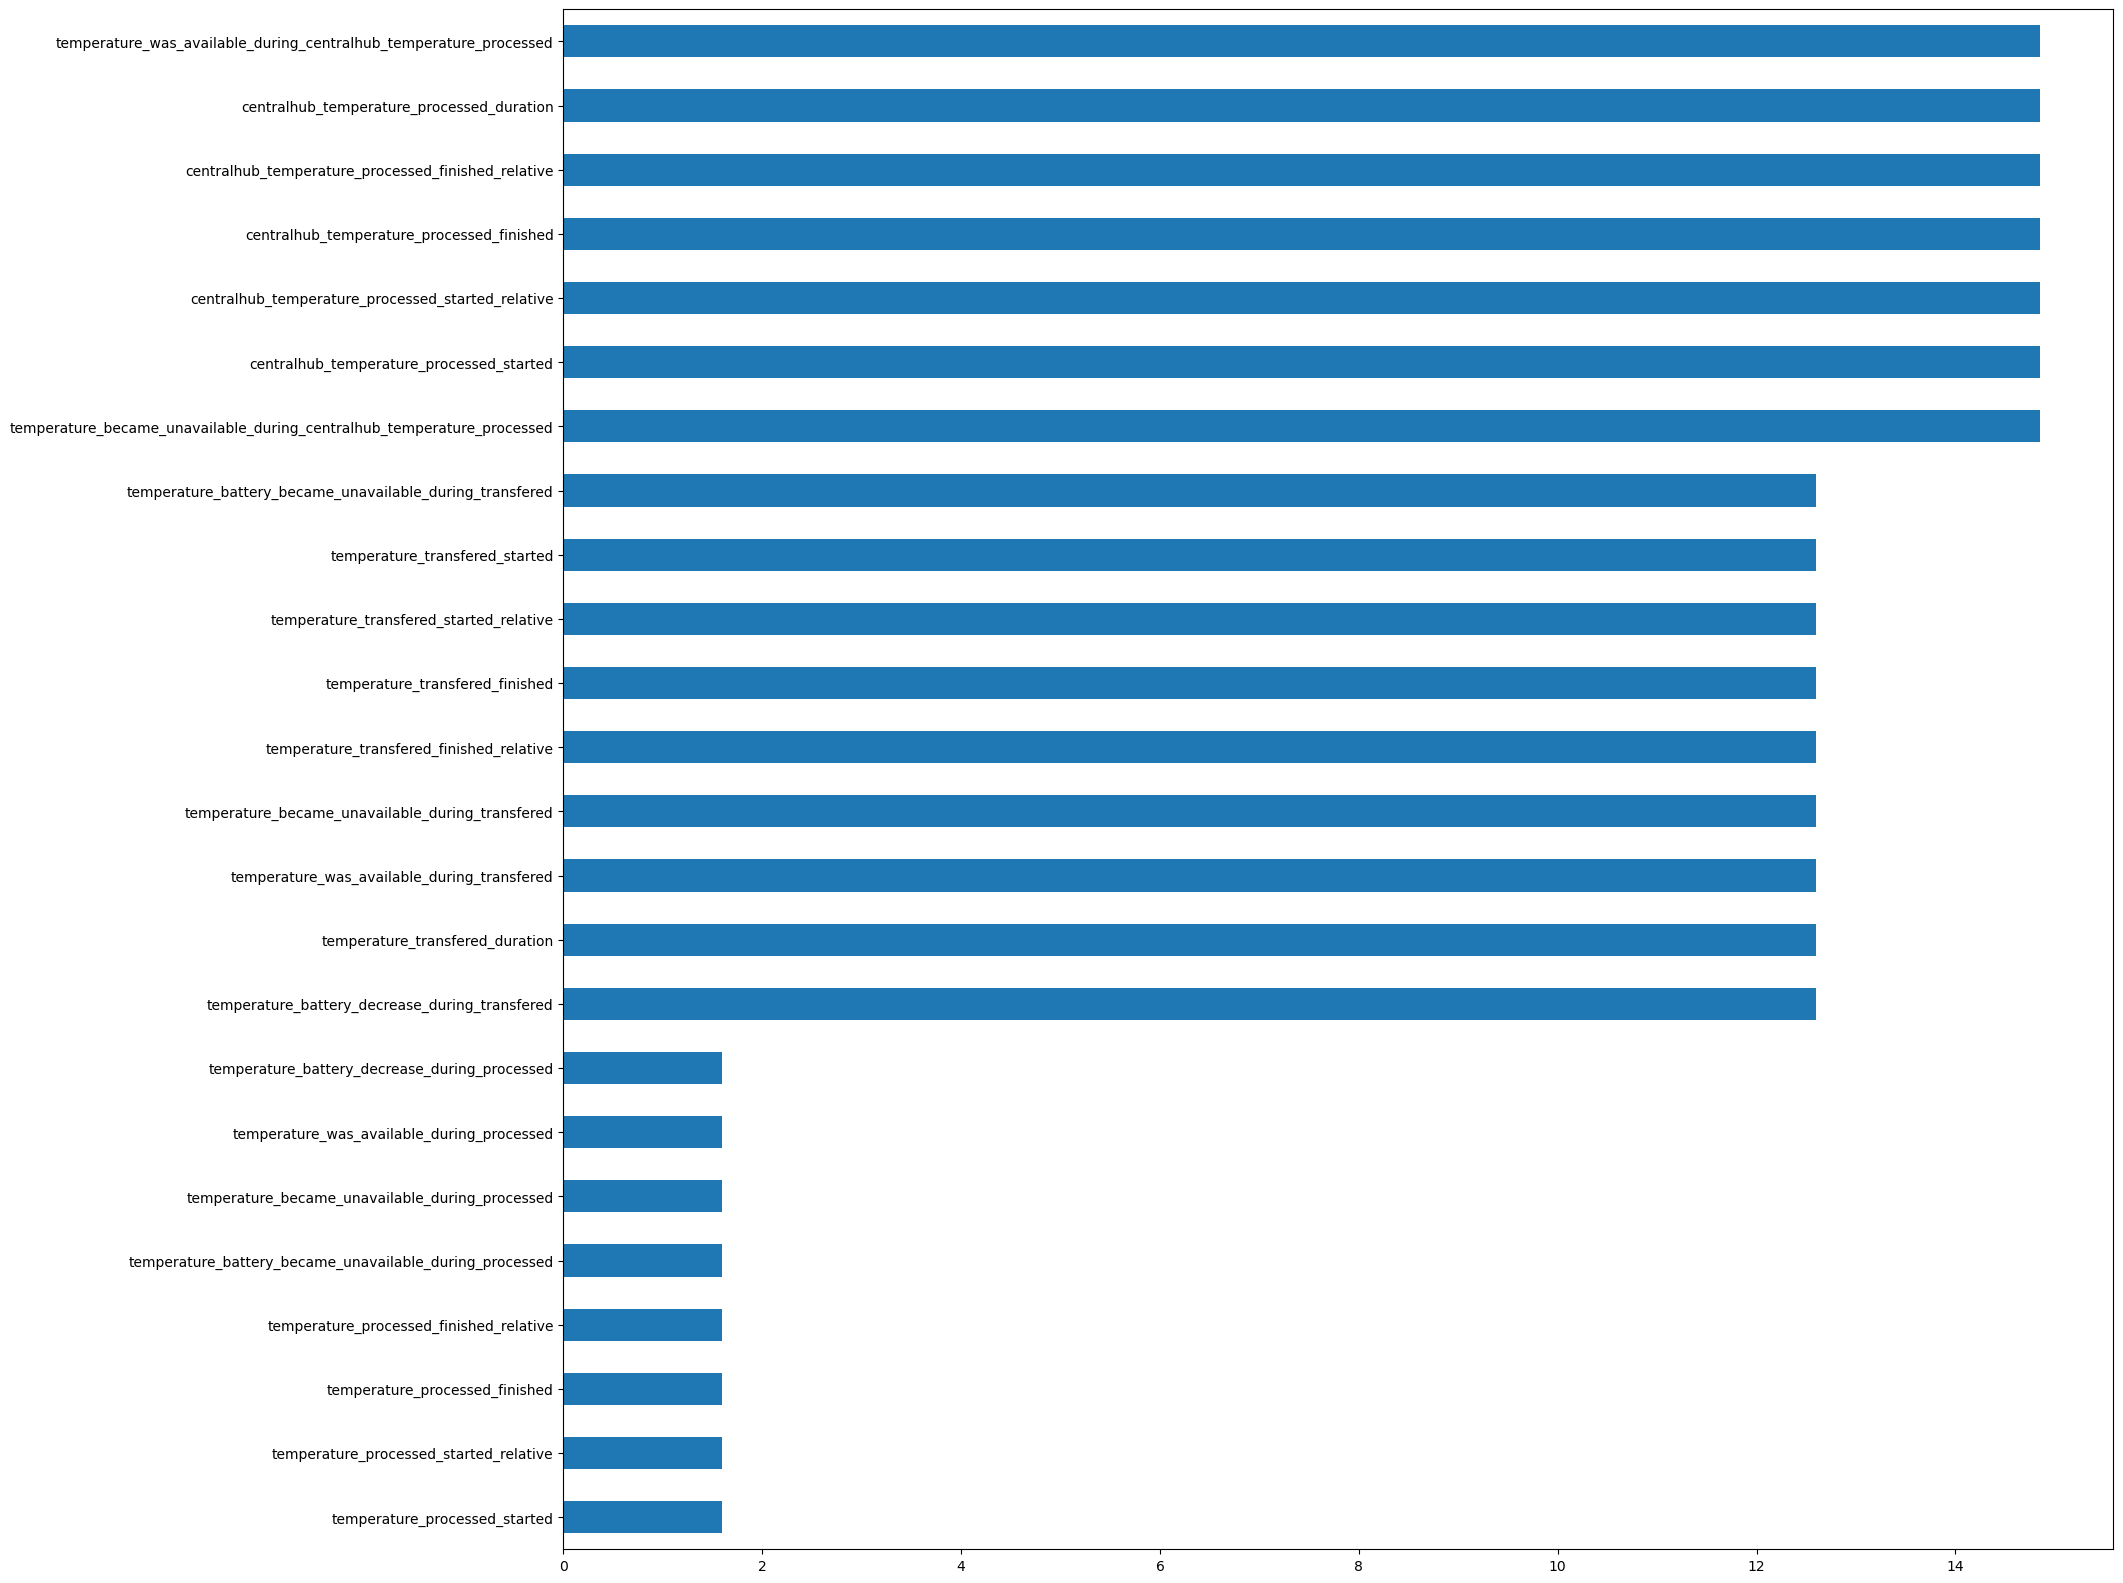

In [8]:
fig, axes = plt.subplots(figsize=(20,20))

missing = (df.isna().sum() / df.shape[0]) * 100
missing = missing[missing > 0].sort_values(ascending=True).head(60)
missing.plot(kind='barh')

* Some variables have 100% of missing data. Most of them are related to the central hub detecting the patient status, which is not evaluated by the property. The others seem irrelevant since they signal the battery of the sensor during the process of the centralhub. Therefore, these variables will be dropped.

* The second block of missing values, close to 20%, are all related to the centralhub processing the data of the sensor. A hypothesis may be that they are missing in cases of property violation, when the sensor data is not processed in time.

In [6]:
df.drop(columns=missing[missing == 100].index, inplace=True)

In [7]:
missing[missing == 100]

centralhub_battery_became_unavailable_during_centralhub_detected      100.0
temperature_was_available_during_centralhub_detected                  100.0
temperature_became_unavailable_during_centralhub_detected             100.0
temperature_error_reached_during_centralhub_detected                  100.0
temperature_battery_became_unavailable_during_centralhub_detected     100.0
temperature_battery_became_unavailable_during_centralhub_processed    100.0
centralhub_detected_finished                                          100.0
centralhub_detected_started_relative                                  100.0
centralhub_detected_started                                           100.0
centralhub_detected                                                   100.0
centralhub_battery_became_unavailable_during_centralhub_processed     100.0
temperature_was_available_during_centralhub_processed                 100.0
temperature_became_unavailable_during_centralhub_processed            100.0
temperature_

# Overview of the dataset

## Columns related to the data collection

In [8]:
coll_cols = [cols for cols in df.columns if 'collected' in cols]

In [9]:
df.filter(coll_cols).describe().T.head(30)

count       mean  \
temperature_collected                               14972.0   1.000000   
temperature_collected_started                       14972.0  31.683609   
temperature_collected_started_relative              14972.0   0.000000   
temperature_collected_finished                      14972.0  31.693609   
temperature_collected_finished_relative             14972.0   0.010000   
temperature_battery_became_unavailable_during_c...  14972.0   0.015963   
temperature_error_reached_during_collected          14972.0   0.000000   
temperature_became_unavailable_during_collected     14972.0   0.000000   
temperature_was_available_during_collected          14972.0   1.000000   
temperature_collected_duration                      14972.0   0.010000   
temperature_battery_decrease_during_collected       14972.0   0.015935   

                                                             std       min  \
temperature_collected                               0.000000e+00  1.000000   
temperature_collected_started                       1.844577e+01  3.500000   
temperature_collected_started_relative              0.000000e+00  0.000000   
temperature_collected_finished                      1.844577e+01  3.510000   
temperature_collected_finished_relative             1.844718e-09  0.010000   
temperature_battery_became_unavailable_during_c...  1.253370e-01  0.000000   
temperature_error_reached_during_collected          0.000000e+00  0.000000   
temperature_became_unavailable_during_collected     0.000000e+00  0.000000   
temperature_was_available_during_collected          0.000000e+00  1.000000   
temperature_collected_duration                      1.844718e-09  0.010000   
temperature_battery_decrease_during_collected       4.140312e-03  0.005766   

                                                          25%       50%  \
temperature_collected                                1.000000   1.00000   
temperature_collected_started                       16.000000  31.00000   
temperature_collected_started_relative               0.000000   0.00000   
temperature_collected_finished                      16.010000  31.01000   
temperature_collected_finished_relative              0.010000   0.01000   
temperature_battery_became_unavailable_during_c...   0.000000   0.00000   
temperature_error_reached_during_collected           0.000000   0.00000   
temperature_became_unavailable_during_collected      0.000000   0.00000   
temperature_was_available_during_collected           1.000000   1.00000   
temperature_collected_duration                       0.010000   0.01000   
temperature_battery_decrease_during_collected        0.012823   0.01542   

                                                          75%        max  
temperature_collected                                1.000000   1.000000  
temperature_collected_started                       46.000000  93.500000  
temperature_collected_started_relative               0.000000   0.000000  
temperature_collected_finished                      46.010000  93.510000  
temperature_collected_finished_relative              0.010000   0.010000  
temperature_battery_became_unavailable_during_c...   0.000000   1.000000  
temperature_error_reached_during_collected           0.000000   0.000000  
temperature_became_unavailable_during_collected      0.000000   0.000000  
temperature_was_available_during_collected           1.000000   1.000000  
temperature_collected_duration                       0.010000   0.010000  
temperature_battery_decrease_during_collected        0.018632   0.032059

* the sensor always collects. This happens because the trace is built around that. Thus, this column will be dropped
* In the same line, the sensor always collects in the beginning of the trace. so, the relative time is always zero.
* The duration of the collection is set in the model to be 0.01 seconds. Therefore, the {SENSOR}_collected_finished_relative and the {SENSOR}_collected_duration are always 0.01
* Error is never reached during the collection.
* The sensor never becomes unavailable during collection. Thus, it will be removed for this sensor

In [10]:
df.drop(columns=[
    f'{SENSOR}_collected', 
    f'{SENSOR}_collected_started_relative',
    f'{SENSOR}_collected_finished_relative',
    f'{SENSOR}_collected_duration', 
    f'{SENSOR}_error_reached_during_collected',
    f'{SENSOR}_became_unavailable_during_collected',
    f'{SENSOR}_was_available_during_collected'
],
inplace=True
)

In [11]:
df.filter(coll_cols).describe().T.head(30)

count       mean  \
temperature_collected_started                       14972.0  31.683609   
temperature_collected_finished                      14972.0  31.693609   
temperature_battery_became_unavailable_during_c...  14972.0   0.015963   
temperature_battery_decrease_during_collected       14972.0   0.015935   

                                                          std       min  \
temperature_collected_started                       18.445768  3.500000   
temperature_collected_finished                      18.445768  3.510000   
temperature_battery_became_unavailable_during_c...   0.125337  0.000000   
temperature_battery_decrease_during_collected        0.004140  0.005766   

                                                          25%       50%  \
temperature_collected_started                       16.000000  31.00000   
temperature_collected_finished                      16.010000  31.01000   
temperature_battery_became_unavailable_during_c...   0.000000   0.00000   
temperature_battery_decrease_during_collected        0.012823   0.01542   

                                                          75%        max  
temperature_collected_started                       46.000000  93.500000  
temperature_collected_finished                      46.010000  93.510000  
temperature_battery_became_unavailable_during_c...   0.000000   1.000000  
temperature_battery_decrease_during_collected        0.018632   0.032059

## Columns related to the data Process

In [12]:
proc_cols = [cols for cols in df.columns if 'processed' in cols and 'centralhub' not in cols]

In [13]:
df.filter(proc_cols).describe().T.head(30)

count       mean  \
temperature_processed                               14972.0   0.984037   
temperature_processed_started                       14733.0  31.770388   
temperature_processed_started_relative              14733.0   0.509239   
temperature_processed_finished                      14733.0  31.780388   
temperature_processed_finished_relative             14733.0   0.519239   
temperature_battery_became_unavailable_during_p...  14733.0   0.018258   
temperature_error_reached_during_processed          14733.0   0.000000   
temperature_became_unavailable_during_processed     14733.0   0.001561   
temperature_was_available_during_processed          14733.0   0.968506   
temperature_processed_duration                      14733.0   0.010000   
temperature_battery_decrease_during_processed       14733.0   0.015911   

                                                             std       min  \
temperature_processed                               1.253370e-01  0.000000   
temperature_processed_started                       1.822561e+01  3.522261   
temperature_processed_started_relative              1.637089e-01  0.010889   
temperature_processed_finished                      1.822561e+01  3.532261   
temperature_processed_finished_relative             1.637089e-01  0.020889   
temperature_battery_became_unavailable_during_p...  1.338887e-01  0.000000   
temperature_error_reached_during_processed          0.000000e+00  0.000000   
temperature_became_unavailable_during_processed     3.948151e-02  0.000000   
temperature_was_available_during_processed          1.746543e-01  0.000000   
temperature_processed_duration                      1.820925e-09  0.010000   
temperature_battery_decrease_during_processed       4.147360e-03  0.005766   

                                                          25%        50%  \
temperature_processed                                1.000000   1.000000   
temperature_processed_started                       16.532480  31.252313   
temperature_processed_started_relative               0.396821   0.509315   
temperature_processed_finished                      16.542480  31.262313   
temperature_processed_finished_relative              0.406821   0.519315   
temperature_battery_became_unavailable_during_p...   0.000000   0.000000   
temperature_error_reached_during_processed           0.000000   0.000000   
temperature_became_unavailable_during_processed      0.000000   0.000000   
temperature_was_available_during_processed           1.000000   1.000000   
temperature_processed_duration                       0.010000   0.010000   
temperature_battery_decrease_during_processed        0.012792   0.015404   

                                                          75%        max  
temperature_processed                                1.000000   1.000000  
temperature_processed_started                       44.156345  93.991077  
temperature_processed_started_relative               0.621333   1.008536  
temperature_processed_finished                      44.166346  94.001077  
temperature_processed_finished_relative              0.631333   1.018536  
temperature_battery_became_unavailable_during_p...   0.000000   1.000000  
temperature_error_reached_during_processed           0.000000   0.000000  
temperature_became_unavailable_during_processed      0.000000   1.000000  
temperature_was_available_during_processed           1.000000   1.000000  
temperature_processed_duration                       0.010000   0.010000  
temperature_battery_decrease_during_processed        0.018618   0.031893

* Error is never reached during the collection.
* The duration is always 0.01. This means that the sensor always finishes processing.

In [14]:
df.groupby([f'{SENSOR}_became_unavailable_during_processed',f'{SENSOR}_was_available_during_processed']).size()

temperature_became_unavailable_during_processed  temperature_was_available_during_processed
0.0                                              0.0                                             441
                                                 1.0                                           14269
1.0                                              0.0                                              23
dtype: int64

In [15]:
df.drop(columns=[
    f'{SENSOR}_error_reached_during_processed', 
    f'{SENSOR}_processed_duration'
],
inplace=True
)

In [16]:
df.filter(proc_cols).describe().T.head(30)

count       mean  \
temperature_processed                               14972.0   0.984037   
temperature_processed_started                       14733.0  31.770388   
temperature_processed_started_relative              14733.0   0.509239   
temperature_processed_finished                      14733.0  31.780388   
temperature_processed_finished_relative             14733.0   0.519239   
temperature_battery_became_unavailable_during_p...  14733.0   0.018258   
temperature_became_unavailable_during_processed     14733.0   0.001561   
temperature_was_available_during_processed          14733.0   0.968506   
temperature_battery_decrease_during_processed       14733.0   0.015911   

                                                          std       min  \
temperature_processed                                0.125337  0.000000   
temperature_processed_started                       18.225614  3.522261   
temperature_processed_started_relative               0.163709  0.010889   
temperature_processed_finished                      18.225614  3.532261   
temperature_processed_finished_relative              0.163709  0.020889   
temperature_battery_became_unavailable_during_p...   0.133889  0.000000   
temperature_became_unavailable_during_processed      0.039482  0.000000   
temperature_was_available_during_processed           0.174654  0.000000   
temperature_battery_decrease_during_processed        0.004147  0.005766   

                                                          25%        50%  \
temperature_processed                                1.000000   1.000000   
temperature_processed_started                       16.532480  31.252313   
temperature_processed_started_relative               0.396821   0.509315   
temperature_processed_finished                      16.542480  31.262313   
temperature_processed_finished_relative              0.406821   0.519315   
temperature_battery_became_unavailable_during_p...   0.000000   0.000000   
temperature_became_unavailable_during_processed      0.000000   0.000000   
temperature_was_available_during_processed           1.000000   1.000000   
temperature_battery_decrease_during_processed        0.012792   0.015404   

                                                          75%        max  
temperature_processed                                1.000000   1.000000  
temperature_processed_started                       44.156345  93.991077  
temperature_processed_started_relative               0.621333   1.008536  
temperature_processed_finished                      44.166346  94.001077  
temperature_processed_finished_relative              0.631333   1.018536  
temperature_battery_became_unavailable_during_p...   0.000000   1.000000  
temperature_became_unavailable_during_processed      0.000000   1.000000  
temperature_was_available_during_processed           1.000000   1.000000  
temperature_battery_decrease_during_processed        0.018618   0.031893

## Columns related to the data Transfer

In [17]:
transf_cols = [cols for cols in df.columns if 'transfer' in cols]

In [18]:
df.filter(transf_cols).describe().T.head(30)

count       mean  \
temperature_transfered                              14972.0   0.874032   
temperature_transfered_started                      13086.0  31.776440   
temperature_transfered_started_relative             13086.0   1.014481   
temperature_transfered_finished                     13086.0  31.786343   
temperature_transfered_finished_relative            13086.0   1.024384   
temperature_battery_became_unavailable_during_t...  13086.0   0.018493   
temperature_error_reached_during_transfered         13086.0   0.000000   
temperature_became_unavailable_during_transfered    13086.0   0.000993   
temperature_was_available_during_transfered         13086.0   0.999007   
temperature_transfered_duration                     13086.0   0.009903   
temperature_battery_decrease_during_transfered      13086.0   0.015772   

                                                          std       min  \
temperature_transfered                               0.331825  0.000000   
temperature_transfered_started                      17.919358  3.772324   
temperature_transfered_started_relative              0.230996  0.147964   
temperature_transfered_finished                     17.919229  3.782324   
temperature_transfered_finished_relative             0.230991  0.157964   
temperature_battery_became_unavailable_during_t...   0.134731  0.000000   
temperature_error_reached_during_transfered          0.000000  0.000000   
temperature_became_unavailable_during_transfered     0.031504  0.000000   
temperature_was_available_during_transfered          0.031504  0.000000   
temperature_transfered_duration                      0.000795  0.000080   
temperature_battery_decrease_during_transfered       0.004319  0.000183   

                                                          25%        50%  \
temperature_transfered                               1.000000   1.000000   
temperature_transfered_started                      16.986479  29.821923   
temperature_transfered_started_relative              0.860194   1.011167   
temperature_transfered_finished                     16.996479  29.831923   
temperature_transfered_finished_relative             0.870024   1.020984   
temperature_battery_became_unavailable_during_t...   0.000000   0.000000   
temperature_error_reached_during_transfered          0.000000   0.000000   
temperature_became_unavailable_during_transfered     0.000000   0.000000   
temperature_was_available_during_transfered          1.000000   1.000000   
temperature_transfered_duration                      0.010000   0.010000   
temperature_battery_decrease_during_transfered       0.012695   0.015301   

                                                          75%        max  
temperature_transfered                               1.000000   1.000000  
temperature_transfered_started                      44.529926  92.320128  
temperature_transfered_started_relative              1.173393   1.879275  
temperature_transfered_finished                     44.539926  92.330128  
temperature_transfered_finished_relative             1.183332   1.889275  
temperature_battery_became_unavailable_during_t...   0.000000   1.000000  
temperature_error_reached_during_transfered          0.000000   0.000000  
temperature_became_unavailable_during_transfered     0.000000   1.000000  
temperature_was_available_during_transfered          1.000000   1.000000  
temperature_transfered_duration                      0.010000   0.010000  
temperature_battery_decrease_during_transfered       0.018536   0.031313

* Error is never reached during the collection.
* There are some cases in which the duration of the data transfer is less than 0.01. This means that the battery ran out during the data transfer or that the sensor context became unavailable.

In [19]:
(df
.query(f'{SENSOR}_transfered_duration < 0.01')
.groupby([
    f'{SENSOR}_became_unavailable_during_transfered',
    f'{SENSOR}_battery_became_unavailable_during_transfered'
])
.size()
)

temperature_became_unavailable_during_transfered  temperature_battery_became_unavailable_during_transfered
0.0                                               1.0                                                         242
1.0                                               0.0                                                          13
dtype: int64

These two columns are mutually exclusive. Thus, one of them will be dropped.

In [20]:
df.drop(columns=[
    f'{SENSOR}_error_reached_during_transfered'
],
inplace=True
)

In [21]:
df.filter(transf_cols).describe().T.head(30)

count       mean  \
temperature_transfered                              14972.0   0.874032   
temperature_transfered_started                      13086.0  31.776440   
temperature_transfered_started_relative             13086.0   1.014481   
temperature_transfered_finished                     13086.0  31.786343   
temperature_transfered_finished_relative            13086.0   1.024384   
temperature_battery_became_unavailable_during_t...  13086.0   0.018493   
temperature_became_unavailable_during_transfered    13086.0   0.000993   
temperature_was_available_during_transfered         13086.0   0.999007   
temperature_transfered_duration                     13086.0   0.009903   
temperature_battery_decrease_during_transfered      13086.0   0.015772   

                                                          std       min  \
temperature_transfered                               0.331825  0.000000   
temperature_transfered_started                      17.919358  3.772324   
temperature_transfered_started_relative              0.230996  0.147964   
temperature_transfered_finished                     17.919229  3.782324   
temperature_transfered_finished_relative             0.230991  0.157964   
temperature_battery_became_unavailable_during_t...   0.134731  0.000000   
temperature_became_unavailable_during_transfered     0.031504  0.000000   
temperature_was_available_during_transfered          0.031504  0.000000   
temperature_transfered_duration                      0.000795  0.000080   
temperature_battery_decrease_during_transfered       0.004319  0.000183   

                                                          25%        50%  \
temperature_transfered                               1.000000   1.000000   
temperature_transfered_started                      16.986479  29.821923   
temperature_transfered_started_relative              0.860194   1.011167   
temperature_transfered_finished                     16.996479  29.831923   
temperature_transfered_finished_relative             0.870024   1.020984   
temperature_battery_became_unavailable_during_t...   0.000000   0.000000   
temperature_became_unavailable_during_transfered     0.000000   0.000000   
temperature_was_available_during_transfered          1.000000   1.000000   
temperature_transfered_duration                      0.010000   0.010000   
temperature_battery_decrease_during_transfered       0.012695   0.015301   

                                                          75%        max  
temperature_transfered                               1.000000   1.000000  
temperature_transfered_started                      44.529926  92.320128  
temperature_transfered_started_relative              1.173393   1.879275  
temperature_transfered_finished                     44.539926  92.330128  
temperature_transfered_finished_relative             1.183332   1.889275  
temperature_battery_became_unavailable_during_t...   0.000000   1.000000  
temperature_became_unavailable_during_transfered     0.000000   1.000000  
temperature_was_available_during_transfered          1.000000   1.000000  
temperature_transfered_duration                      0.010000   0.010000  
temperature_battery_decrease_during_transfered       0.018536   0.031313

## Columns related to the Central Hub

In [22]:
ch_cols = [cols for cols in df.columns if 'centralhub' in cols]

In [23]:
df.filter(ch_cols).describe().T.head(60)

count       mean  \
centralhub_temperature_processed                    14972.0   0.851523   
centralhub_temperature_processed_started            12749.0  31.802971   
centralhub_temperature_processed_started_relative   12749.0   1.519890   
centralhub_temperature_processed_finished           12749.0  31.812969   
centralhub_temperature_processed_finished_relative  12749.0   1.529888   
centralhub_temperature_processed_duration           12749.0   0.009998   
centralhub_battery_decrease_during_trace            14972.0   0.009861   
centralhub_battery_became_unavailable_during_ce...  12749.0   0.000000   
temperature_battery_became_unavailable_during_c...  12749.0   0.000000   
temperature_error_reached_during_centralhub_tem...  12749.0   0.000000   
temperature_became_unavailable_during_centralhu...  12749.0   0.000392   
temperature_was_available_during_centralhub_tem...  12749.0   0.941407   
centralhub_battery_cell_soc_max                     14972.0   0.857991   
centralhub_battery_cell_soc_mean                    14972.0   0.830054   
centralhub_battery_cell_soc_std                     14972.0   0.018852   
centralhub_battery_cell_soc_min                     14972.0   0.795788   
centralhub_detect_risk_max                          14972.0  63.178291   
centralhub_detect_risk_mean                         14972.0  56.976547   
centralhub_detect_risk_std                          14972.0   5.304180   
centralhub_detect_risk_min                          14972.0  51.216568   
centralhub_sig_emergency_max                        14972.0   0.628640   
centralhub_battery_sig_battery_on_became_unavai...  14972.0   0.000000   

                                                          std       min  \
centralhub_temperature_processed                     0.355584  0.000000   
centralhub_temperature_processed_started            17.676220  4.049412   
centralhub_temperature_processed_started_relative    0.283229  0.444125   
centralhub_temperature_processed_finished           17.676220  4.059412   
centralhub_temperature_processed_finished_relative   0.283228  0.454125   
centralhub_temperature_processed_duration            0.000092  0.002039   
centralhub_battery_decrease_during_trace             0.029245 -0.069444   
centralhub_battery_became_unavailable_during_ce...   0.000000  0.000000   
temperature_battery_became_unavailable_during_c...   0.000000  0.000000   
temperature_error_reached_during_centralhub_tem...   0.000000  0.000000   
temperature_became_unavailable_during_centralhu...   0.019801  0.000000   
temperature_was_available_during_centralhub_tem...   0.234870  0.000000   
centralhub_battery_cell_soc_max                      0.104776  0.407144   
centralhub_battery_cell_soc_mean                     0.105888  0.373753   
centralhub_battery_cell_soc_std                      0.008379  0.000000   
centralhub_battery_cell_soc_min                      0.106138  0.334983   
centralhub_detect_risk_max                          11.356901  0.000000   
centralhub_detect_risk_mean                         13.609531  0.000000   
centralhub_detect_risk_std                           6.862887  0.000000   
centralhub_detect_risk_min                          17.581546  0.000000   
centralhub_sig_emergency_max                         0.483185  0.000000   
centralhub_battery_sig_battery_on_became_unavai...   0.000000  0.000000   

                                                          25%        50%  \
centralhub_temperature_processed                     1.000000   1.000000   
centralhub_temperature_processed_started            17.413083  30.166191   
centralhub_temperature_processed_started_relative    1.327403   1.517354   
centralhub_temperature_processed_finished           17.423083  30.176191   
centralhub_temperature_processed_finished_relative   1.337403   1.527354   
centralhub_temperature_processed_duration            0.010000   0.010000   
centralhub_battery_decrease_during_trace            -0.008661   0.010292   
centralhub_batter

* In some weird cases, the battery increases... (battery decrease is negative)
* Some variables are always zero.

In [24]:
(df
.query( f'{SENSOR}_transfered_duration < 0.01')
.groupby([
    f'{SENSOR}_became_unavailable_during_transfered',
    f'{SENSOR}_battery_became_unavailable_during_transfered'
])
.size()
)

temperature_became_unavailable_during_transfered  temperature_battery_became_unavailable_during_transfered
0.0                                               1.0                                                         242
1.0                                               0.0                                                          13
dtype: int64

In [25]:
df.drop(columns=[
    f'centralhub_battery_became_unavailable_during_centralhub_{SENSOR}_processed',
    f'{SENSOR}_battery_became_unavailable_during_centralhub_{SENSOR}_processed',
    f'{SENSOR}_error_reached_during_centralhub_{SENSOR}_processed',
    'centralhub_battery_sig_battery_on_became_unavailable_max'
],
inplace=True
)

In [26]:
df.filter(ch_cols).describe().T.head(30)

count       mean  \
centralhub_temperature_processed                    14972.0   0.851523   
centralhub_temperature_processed_started            12749.0  31.802971   
centralhub_temperature_processed_started_relative   12749.0   1.519890   
centralhub_temperature_processed_finished           12749.0  31.812969   
centralhub_temperature_processed_finished_relative  12749.0   1.529888   
centralhub_temperature_processed_duration           12749.0   0.009998   
centralhub_battery_decrease_during_trace            14972.0   0.009861   
temperature_became_unavailable_during_centralhu...  12749.0   0.000392   
temperature_was_available_during_centralhub_tem...  12749.0   0.941407   
centralhub_battery_cell_soc_max                     14972.0   0.857991   
centralhub_battery_cell_soc_mean                    14972.0   0.830054   
centralhub_battery_cell_soc_std                     14972.0   0.018852   
centralhub_battery_cell_soc_min                     14972.0   0.795788   
centralhub_detect_risk_max                          14972.0  63.178291   
centralhub_detect_risk_mean                         14972.0  56.976547   
centralhub_detect_risk_std                          14972.0   5.304180   
centralhub_detect_risk_min                          14972.0  51.216568   
centralhub_sig_emergency_max                        14972.0   0.628640   

                                                          std       min  \
centralhub_temperature_processed                     0.355584  0.000000   
centralhub_temperature_processed_started            17.676220  4.049412   
centralhub_temperature_processed_started_relative    0.283229  0.444125   
centralhub_temperature_processed_finished           17.676220  4.059412   
centralhub_temperature_processed_finished_relative   0.283228  0.454125   
centralhub_temperature_processed_duration            0.000092  0.002039   
centralhub_battery_decrease_during_trace             0.029245 -0.069444   
temperature_became_unavailable_during_centralhu...   0.019801  0.000000   
temperature_was_available_during_centralhub_tem...   0.234870  0.000000   
centralhub_battery_cell_soc_max                      0.104776  0.407144   
centralhub_battery_cell_soc_mean                     0.105888  0.373753   
centralhub_battery_cell_soc_std                      0.008379  0.000000   
centralhub_battery_cell_soc_min                      0.106138  0.334983   
centralhub_detect_risk_max                          11.356901  0.000000   
centralhub_detect_risk_mean                         13.609531  0.000000   
centralhub_detect_risk_std                           6.862887  0.000000   
centralhub_detect_risk_min                          17.581546  0.000000   
centralhub_sig_emergency_max                         0.483185  0.000000   

                                                          25%        50%  \
centralhub_temperature_processed                     1.000000   1.000000   
centralhub_temperature_processed_started            17.413083  30.166191   
centralhub_temperature_processed_started_relative    1.327403   1.517354   
centralhub_temperature_processed_finished           17.423083  30.176191   
centralhub_temperature_processed_finished_relative   1.337403   1.527354   
centralhub_temperature_processed_duration            0.010000   0.010000   
centralhub_battery_decrease_during_trace            -0.008661   0.010292   
temperature_became_unavailable_during_centralhu...   0.000000   0.000000   
temperature_was_available_during_centralhub_tem...   1.000000   1.000000   
centralhub_battery_cell_soc_max                      0.782541   0.867514   
centralhub_battery_cell_soc_mean                     0.754094   0.837608   
centralhub_battery_cell_soc_std                      0.012278   0.017548   
centralhub_battery_cell_soc_min                      0.720442   0.802672   
centralhub_detect_risk_max                          56.492125  63.673866   
centralhub_detect_risk_mean                         51.884392  58.418905   
centr

## Columns related to the Observer

The Observer being in an error state is a proxy for a property violation. Thus, it doesn't make sense to keep features related to it in the data.

In [27]:
obs_cols = [col for col in df.columns if 'observer' in col]

In [28]:
df = df.drop(columns = [col for col in df.columns if 'observer' in col])

## Other columns

In [29]:
oth_cols = [col for col in df.columns if (col not in coll_cols) and (col not in proc_cols) and (col not in transf_cols) and (col not in ch_cols)]

In [30]:
df.filter(oth_cols).describe().T.head(30)

count        mean        std  \
temperature_trace_no                        14972.0    9.880377   6.432162   
temperature_battery_decrease_during_trace   14972.0    0.045378   0.012704   
time_min                                    14972.0   31.683609  18.445768   
time_max                                    14972.0   34.183520  18.445905   
abpd_context_min                            14972.0    0.662236   0.472963   
abps_context_min                            14972.0    0.665309   0.471898   
heartrate_context_min                       14972.0    0.650414   0.476855   
oximeter_context_min                        14972.0    0.655824   0.475115   
temperature_context_min                     14972.0    0.743388   0.436778   
abpd_context_became_unavailable_max         14972.0    0.242920   0.428862   
abps_context_became_unavailable_max         14972.0    0.239313   0.426679   
heartrate_context_became_unavailable_max    14972.0    0.249599   0.432796   
oximeter_context_became_unavailable_max     14972.0    0.247662   0.431669   
temperature_context_became_unavailable_max  14972.0    0.256612   0.436778   
abpd_measurement_max                        14972.0   73.589782  41.572647   
abpd_measurement_mean                       14972.0   46.449555  24.423415   
abpd_measurement_std                        14972.0   15.314859  12.097666   
abpd_measurement_min                        14972.0   21.411145  17.551603   
abps_measurement_max                        14972.0  149.743549  66.524150   
abps_measurement_mean                       14972.0  105.628845  55.019953   
abps_measurement_std                        14972.0   25.737568  15.869507   
abps_measurement_min                        14972.0   62.778836  51.449673   
heartrate_measurement_max                   14972.0  108.315767  52.857716   
heartrate_measurement_mean                  14972.0   90.204507  38.809324   
heartrate_measurement_std                   14972.0   10.575349  12.747947   
heartrate_measurement_min                   14972.0   72.983390  34.334240   
oximeter_measurement_max                    14972.0   91.844859   6.131622   
oximeter_measurement_mean                   14972.0   82.519170   5.793076   
oximeter_measurement_std                    14972.0    5.452465   2.365348   
oximeter_measurement_min                    14972.0   73.221031   6.276402   

                                                  min         25%         50%  \
temperature_trace_no                         0.000000    4.000000    9.000000   
temperature_battery_decrease_during_trace    0.009408    0.036479    0.044129   
time_min                                     3.500000   16.000000   31.000000   
time_max                                     5.998000   18.500000   33.500000   
abpd_context_min                             0.000000    0.000000    1.000000   
abps_context_min                             0.000000    0.000000    1.000000   
heartrate_context_min                        0.000000    0.000000    1.000000   
oximeter_context_min                         0.000000    0.000000    1.000000   
temperature_context_min                      0.000000    0.000000    1.000000   
abpd_context_became_unavailable_max          0.000000    0.000000    0.000000   
abps_context_became_unavailable_max          0.000000    0.000000    0.000000   
heartrate_context_became_unavailable_max     0.000000    0.000000    0.000000   
oximeter_context_became_unavailable_max      0.000000    0.000000    0.000000   
temperature_context_became_unavailable_max   0.000000    0.000000    0.000000   
abpd_measurement_max                         6.673964   55.024027   67.873983   
abpd_measurement_mean                        2.661246   32.562478   43.027598   
abpd_measurement_std                         0.396828    8.636869   12.947557   
abpd_measurement_min                         0.008864    7.670946   17.814979   
abps_measurement_max                        11.058552  104.922067  131.339050   
abps_me

In [31]:
df.groupby([f'{SENSOR}_context_min',f'{SENSOR}_context_became_unavailable_max']).size()

temperature_context_min  temperature_context_became_unavailable_max
0.0                      1                                              3842
1.0                      0                                             11130
dtype: int64

In [32]:
df.filter(oth_cols).describe().T[30:]

count        mean  \
temperature_measurement_max                        14972.0   41.077096   
temperature_measurement_mean                       14972.0   39.163267   
temperature_measurement_std                        14972.0    1.128503   
temperature_measurement_min                        14972.0   37.244787   
abpd_sig_battery_on_min                            14972.0    0.852324   
abps_sig_battery_on_min                            14972.0    0.851322   
heartrate_sig_battery_on_min                       14972.0    0.853593   
oximeter_sig_battery_on_min                        14972.0    0.844910   
temperature_sig_battery_on_min                     14972.0    0.949906   
abpd_sig_battery_on_became_unavailable_max         14972.0    0.024913   
abps_sig_battery_on_became_unavailable_max         14972.0    0.024245   
heartrate_sig_battery_on_became_unavailable_max    14972.0    0.023978   
oximeter_sig_battery_on_became_unavailable_max     14972.0    0.025114   
temperature_sig_battery_on_became_unavailable_max  14972.0    0.050094   
abpd_battery_cell_soc_max                          14972.0    0.538779   
abpd_battery_cell_soc_mean                         14972.0    0.509352   
abpd_battery_cell_soc_std                          14972.0    0.009527   
abpd_battery_cell_soc_min                          14972.0    0.502083   
abps_battery_cell_soc_max                          14972.0    0.540557   
abps_battery_cell_soc_mean                         14972.0    0.511144   
abps_battery_cell_soc_std                          14972.0    0.009523   
abps_battery_cell_soc_min                          14972.0    0.503862   
heartrate_battery_cell_soc_max                     14972.0    0.541939   
heartrate_battery_cell_soc_mean                    14972.0    0.512612   
heartrate_battery_cell_soc_std                     14972.0    0.009481   
heartrate_battery_cell_soc_min                     14972.0    0.505379   
oximeter_battery_cell_soc_max                      14972.0    0.537258   
oximeter_battery_cell_soc_mean                     14972.0    0.507981   
oximeter_battery_cell_soc_std                      14972.0    0.009457   
oximeter_battery_cell_soc_min                      14972.0    0.500759   
temperature_battery_cell_soc_max                   14972.0    0.561975   
temperature_battery_cell_soc_mean                  14972.0    0.525565   
temperature_battery_cell_soc_std                   14972.0    0.011751   
temperature_battery_cell_soc_min                   14972.0    0.516597   
is_failure                                         14972.0    0.048691   
is_property_violation                              14972.0    0.148477   
seed                                               14972.0  494.856799   

                                                          std        min  \
temperature_measurement_max                         12.209679  29.500154   
temperature_measurement_mean                         8.561412  13.740382   
temperature_measurement_std                          2.478168   0.008573   
temperature_measurement_min                          5.465978   0.242498   
abpd_sig_battery_on_min                              0.354790   0.000000   
abps_sig_battery_on_min                              0.355782   0.000000   
heartrate_sig_battery_on_min                         0.353525   0.000000   
oximeter_sig_battery_on_min                          0.362002   0.000000   
temperature_sig_battery_on_min                       0.218145   0.000000   
abpd_sig_battery_on_became_unavailable_max           0.155866   0.000000   
abps_sig_battery_on_became_unavailable_max           0.153815   0.000000   
heartrate_sig_battery_on_became_unavailable_max      0.152986   0.000000   
oximeter_sig_battery_on_became_unavailable_max       0.156475   0.000000   
temperature_sig_battery_on_became_unavailable_max    0.218145   0.000000   
abpd_battery_cell_soc_max                            0.289734   0.076148   
abpd_battery_cell_soc_me

* sensor_observer_entered_error_state_max is always false, because the trace ends right before entering the error state.

In [33]:
df.groupby([f'{SENSOR}_sig_battery_on_min',f'{SENSOR}_sig_battery_on_became_unavailable_max']).size()

temperature_sig_battery_on_min  temperature_sig_battery_on_became_unavailable_max
0.0                             1                                                      750
1.0                             0                                                    14222
dtype: int64

In [34]:
df.rename(columns={
    f'{SENSOR}_context_became_unavailable_max':f'{SENSOR}_context_became_unavailable_during_trace',
    f'{SENSOR}_sig_battery_on_became_unavailable_max':f'{SENSOR}_battery_became_unavailable_during_trace'
},
inplace=True
)

In [35]:
df.query('is_failure == 1').filter([''])

Empty DataFrame
Columns: []
Index: [8, 13, 21, 54, 67, 80, 120, 148, 162, 163, 188, 210, 236, 252, 268, 286, 295, 378, 395, 415, 449, 458, 484, 502, 511, 536, 537, 542, 565, 581, 599, 604, 617, 632, 652, 667, 682, 700, 725, 764, 782, 788, 801, 818, 839, 872, 895, 910, 916, 927, 944, 987, 1017, 1037, 1074, 1122, 1144, 1160, 1169, 1179, 1184, 1195, 1214, 1234, 1260, 1283, 1303, 1320, 1335, 1353, 1361, 1388, 1413, 1437, 1455, 1495, 1496, 1533, 1557, 1572, 1599, 1621, 1643, 1661, 1682, 1683, 1701, 1746, 1762, 1802, 1819, 1857, 1882, 1910, 1942, 1958, 1977, 1993, 2008, 2022, ...]

[729 rows x 0 columns]

In [37]:
df.drop(columns=[
    f'{SENSOR}_sig_battery_on_min',
    f'{SENSOR}_context_min',
    'is_failure'
],
inplace=True
)

# Correlation

In [38]:
from dython.nominal import associations

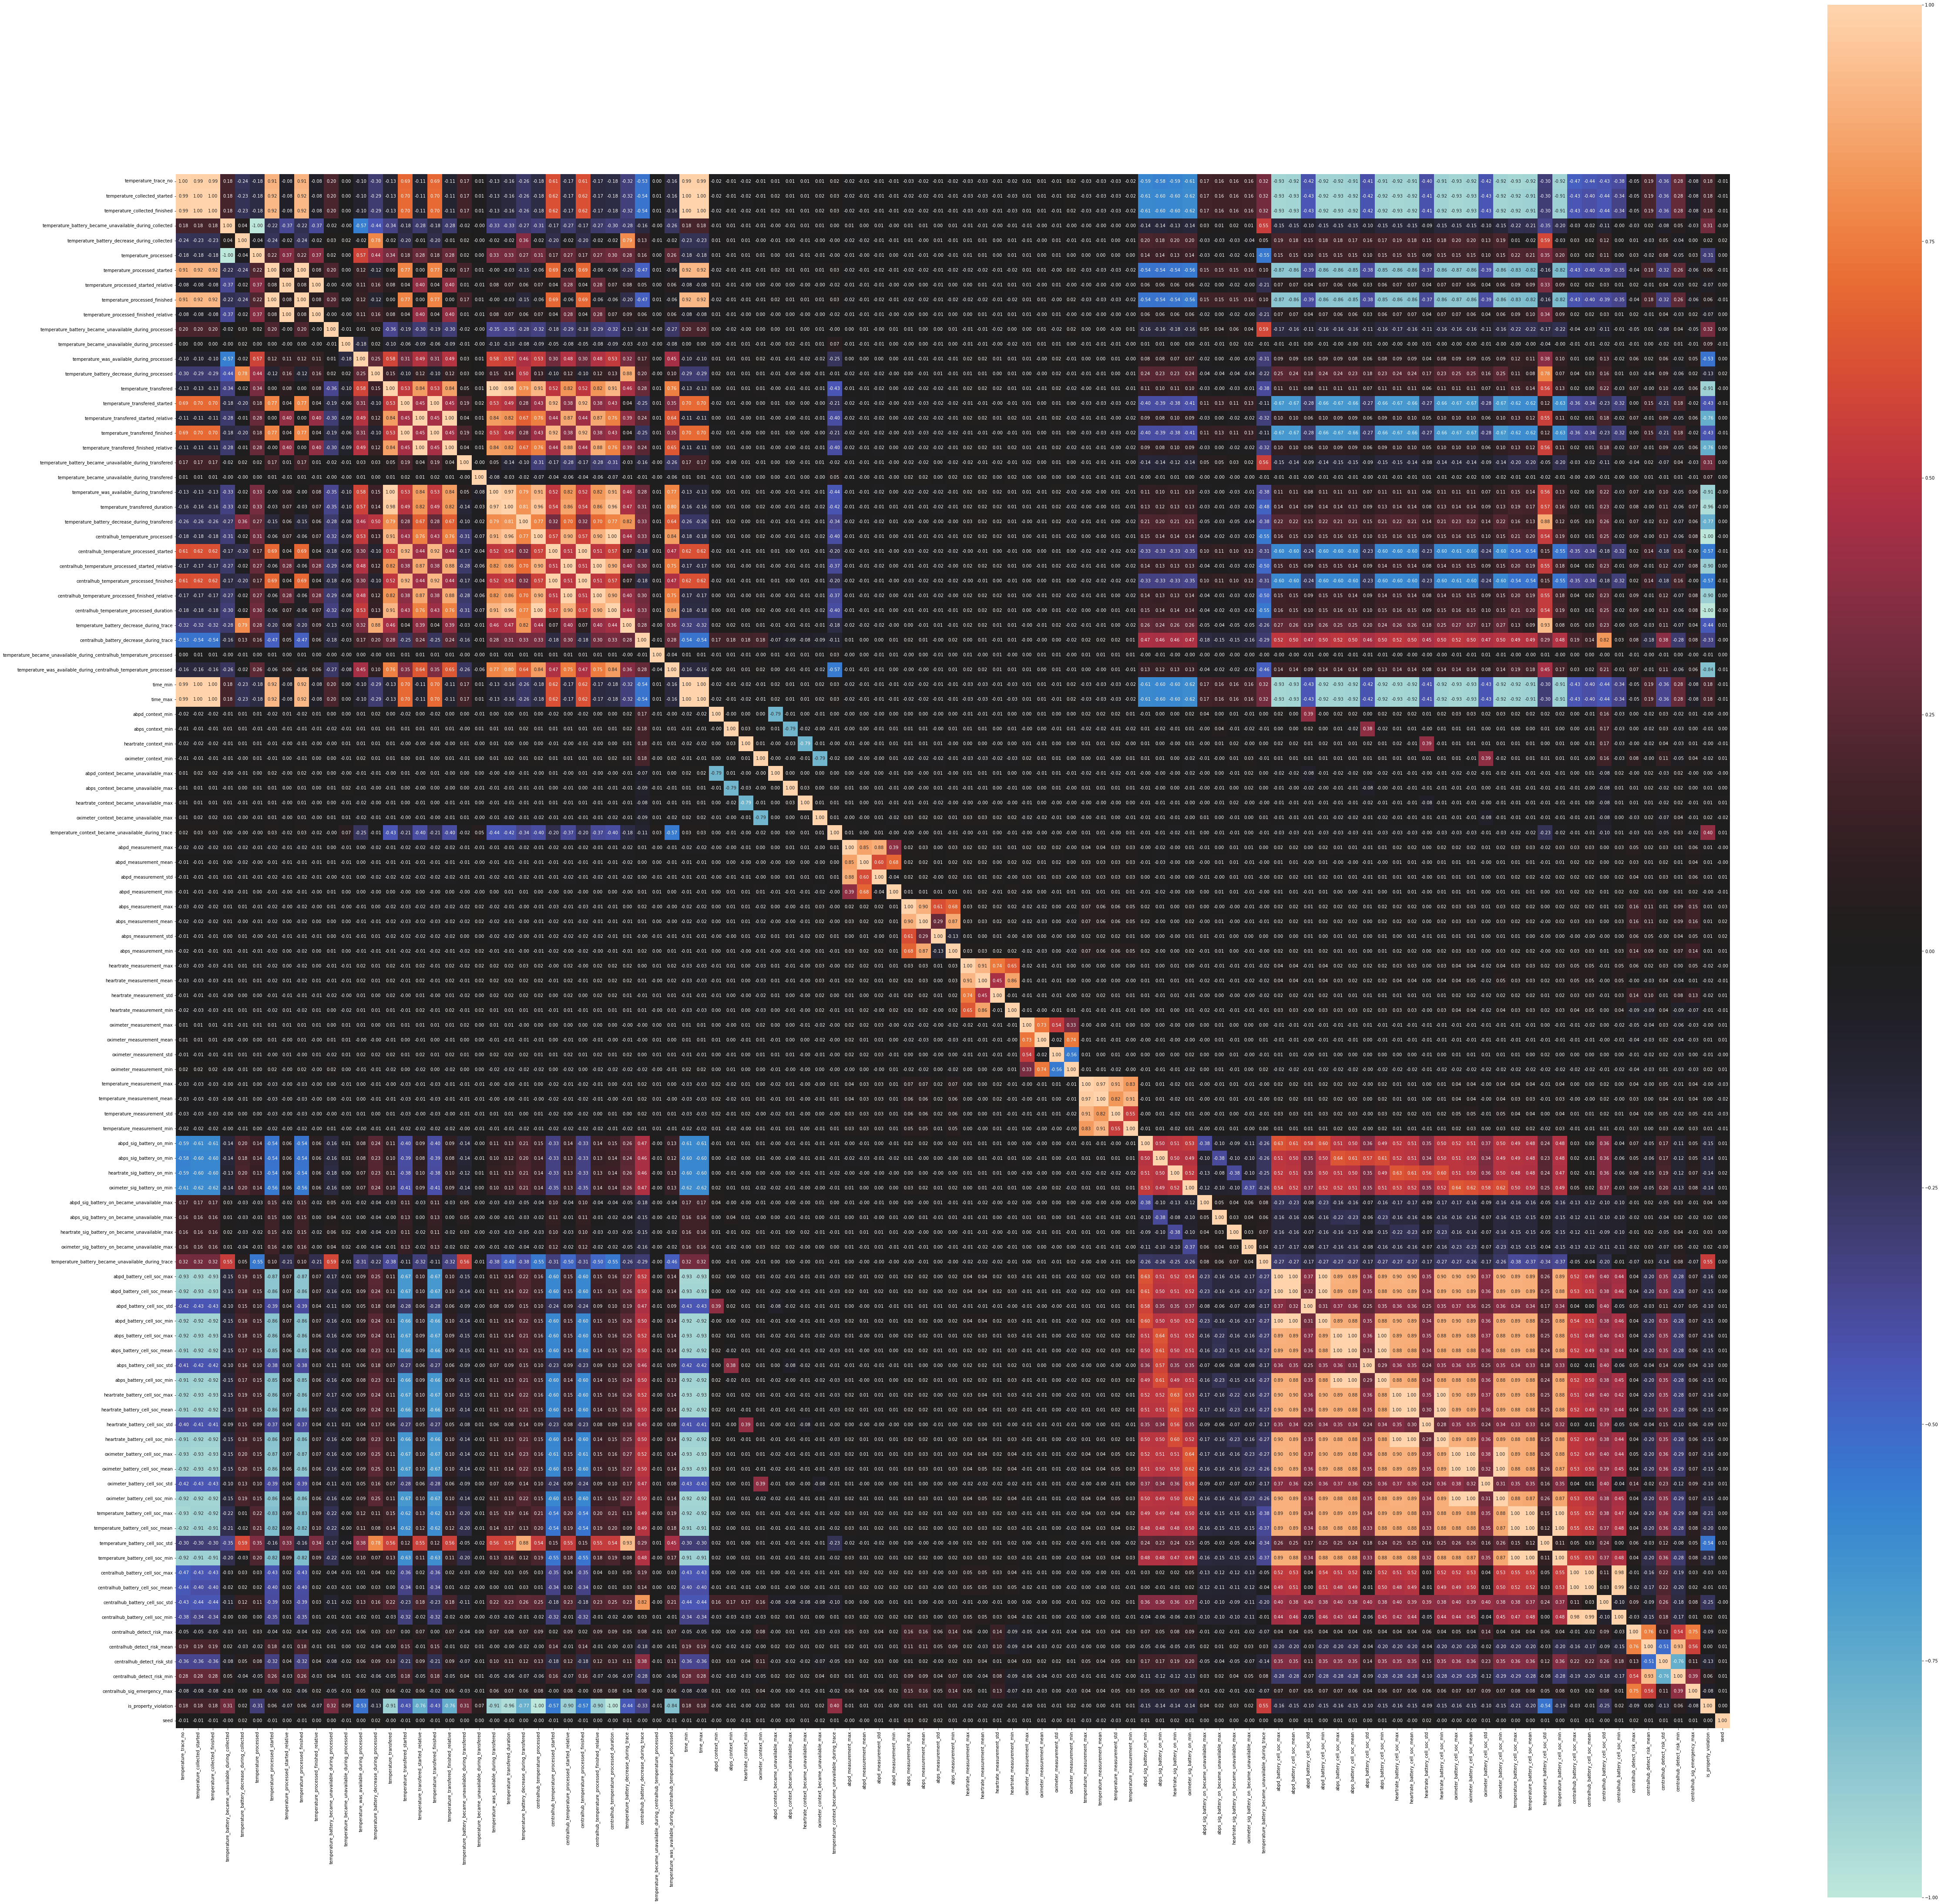

In [39]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(80,80))

In [40]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

In [41]:
(df_complete_corr
.filter(['is_property_violation'])
.dropna(axis=1, how='all')
.dropna(axis=0, how='all')
.style.background_gradient(cmap='coolwarm', axis=None)
.format(precision=2)
)

# Phi Correlation

In [42]:
from sklearn.metrics import matthews_corrcoef

Getting only signal columns:

In [47]:
signal_cols = [
    # f'{SENSOR}_trace_no', 
    # f'{SENSOR}_collected_started',
    # f'{SENSOR}_collected_finished',
    f'{SENSOR}_battery_became_unavailable_during_collected',
    # f'{SENSOR}_battery_decrease_during_collected', 
    f'{SENSOR}_processed',
    # f'{SENSOR}_processed_started', 
    # f'{SENSOR}_processed_started_relative',
    # f'{SENSOR}_processed_finished', 
    # f'{SENSOR}_processed_finished_relative',
    f'{SENSOR}_battery_became_unavailable_during_processed',
    f'{SENSOR}_became_unavailable_during_processed',
    # f'{SENSOR}_was_available_during_processed',
    # f'{SENSOR}_battery_decrease_during_processed', 
    f'{SENSOR}_transfered',
    # f'{SENSOR}_transfered_started', 
    # f'{SENSOR}_transfered_started_relative',
    # f'{SENSOR}_transfered_finished', 
    # f'{SENSOR}_transfered_finished_relative',
    f'{SENSOR}_battery_became_unavailable_during_transfered',
    f'{SENSOR}_became_unavailable_during_transfered',
    f'{SENSOR}_was_available_during_transfered',
    # f'{SENSOR}_transfered_duration',
    # f'{SENSOR}_battery_decrease_during_transfered',
    # f'centralhub_{SENSOR}_processed',
    # f'centralhub_{SENSOR}_processed_started',
    # f'centralhub_{SENSOR}_processed_started_relative',
    # f'centralhub_{SENSOR}_processed_finished',
    # f'centralhub_{SENSOR}_processed_finished_relative',
    # f'centralhub_{SENSOR}_processed_duration',
    # f'{SENSOR}_battery_decrease_during_trace',
    # f'centralhub_battery_decrease_during_trace',
    f'{SENSOR}_became_unavailable_during_centralhub_{SENSOR}_processed',
    f'{SENSOR}_was_available_during_centralhub_{SENSOR}_processed',
    # f'time_min', 
    # f'time_max', 
    f'abpd_context_min', 
    f'abps_context_min',
    f'heartrate_context_min', 
    f'oximeter_context_min',
    f'abpd_context_became_unavailable_max',
    f'abps_context_became_unavailable_max',
    f'heartrate_context_became_unavailable_max',
    f'{SENSOR}_context_became_unavailable_during_trace',
    f'oximeter_context_became_unavailable_max', 
    # f'abpd_measurement_max',
    # f'abpd_measurement_mean', 
    # f'abpd_measurement_std', 
    # f'abpd_measurement_min',
    # f'abps_measurement_max', 
    # f'abps_measurement_mean', 
    # f'abps_measurement_std',
    # f'abps_measurement_min', 
    # f'heartrate_measurement_max',
    # f'heartrate_measurement_mean', 
    # f'heartrate_measurement_std',
    # f'heartrate_measurement_min', 
    # f'{SENSOR}_measurement_max',
    # f'{SENSOR}_measurement_mean', 
    # f'{SENSOR}_measurement_std',
    # f'{SENSOR}_measurement_min', 
    # f'oximeter_measurement_max',
    # f'oximeter_measurement_mean', 
    # f'oximeter_measurement_std',
    # f'oximeter_measurement_min', 
    f'abpd_sig_battery_on_min',
    f'abps_sig_battery_on_min', 
    f'heartrate_sig_battery_on_min',
    f'oximeter_sig_battery_on_min',
    f'abpd_sig_battery_on_became_unavailable_max',
    f'abps_sig_battery_on_became_unavailable_max',
    f'heartrate_sig_battery_on_became_unavailable_max',
    f'{SENSOR}_battery_became_unavailable_during_trace',
    f'oximeter_sig_battery_on_became_unavailable_max',
    # f'abpd_battery_cell_soc_max', 
    # f'abpd_battery_cell_soc_mean',
    # f'abpd_battery_cell_soc_std', 
    # f'abpd_battery_cell_soc_min',
    # f'abps_battery_cell_soc_max', 
    # f'abps_battery_cell_soc_mean',
    # f'abps_battery_cell_soc_std', 
    # f'abps_battery_cell_soc_min',
    # f'heartrate_battery_cell_soc_max', 
    # f'heartrate_battery_cell_soc_mean',
    # f'heartrate_battery_cell_soc_std', 
    # f'heartrate_battery_cell_soc_min',
    # f'{SENSOR}_battery_cell_soc_max', 
    # f'{SENSOR}_battery_cell_soc_mean',
    # f'{SENSOR}_battery_cell_soc_std', 
    # f'{SENSOR}_battery_cell_soc_min',
    # f'oximeter_battery_cell_soc_max', 
    # f'oximeter_battery_cell_soc_mean',
    # f'oximeter_battery_cell_soc_std', 
    # f'oximeter_battery_cell_soc_min',
    # f'centralhub_battery_cell_soc_max', 
    # f'centralhub_battery_cell_soc_mean',
    # f'centralhub_battery_cell_soc_std', 
    # f'centralhub_battery_cell_soc_min',
    # f'centralhub_detect_risk_max', 
    # f'centralhub_detect_risk_mean',
    # f'centralhub_detect_risk_std', 
    # f'centralhub_detect_risk_min',
    f'centralhub_sig_emergency_max', 
    # f'{SENSOR}_observer_error_active_max',
    # f'is_property_violation', 
    # f'seed'
]

In [48]:
df.filter(signal_cols).fillna(0).T

0      1      2      \
temperature_battery_became_unavailable_during_c...    0.0    0.0    0.0   
temperature_processed                                 1.0    1.0    1.0   
temperature_battery_became_unavailable_during_p...    0.0    0.0    0.0   
temperature_became_unavailable_during_processed       0.0    0.0    0.0   
temperature_transfered                                1.0    1.0    1.0   
temperature_battery_became_unavailable_during_t...    0.0    0.0    0.0   
temperature_became_unavailable_during_transfered      0.0    0.0    0.0   
temperature_was_available_during_transfered           1.0    1.0    1.0   
temperature_became_unavailable_during_centralhu...    0.0    0.0    0.0   
temperature_was_available_during_centralhub_tem...    1.0    1.0    1.0   
abpd_context_min                                      0.0    1.0    1.0   
abps_context_min                                      0.0    0.0    1.0   
heartrate_context_min                                 1.0    1.0    1.0   
oximeter_context_min                                  0.0    1.0    1.0   
abpd_context_became_unavailable_max                   0.0    0.0    0.0   
abps_context_became_unavailable_max                   0.0    0.0    0.0   
heartrate_context_became_unavailable_max              0.0    0.0    0.0   
temperature_context_became_unavailable_during_t...    0.0    0.0    0.0   
oximeter_context_became_unavailable_max               1.0    0.0    0.0   
abpd_sig_battery_on_min                               1.0    1.0    1.0   
abps_sig_battery_on_min                               1.0    1.0    1.0   
heartrate_sig_battery_on_min                          1.0    1.0    1.0   
oximeter_sig_battery_on_min                           1.0    1.0    1.0   
abpd_sig_battery_on_became_unavailable_max            0.0    0.0    0.0   
abps_sig_battery_on_became_unavailable_max            0.0    0.0    0.0   
heartrate_sig_battery_on_became_unavailable_max       0.0    0.0    0.0   
temperature_battery_became_unavailable_during_t...    0.0    0.0    0.0   
oximeter_sig_battery_on_became_unavailable_max        0.0    0.0    0.0   
centralhub_sig_emergency_max                          0.0    1.0    1.0   

                                                    3      4      5      \
temperature_battery_became_unavailable_during_c...    0.0    0.0    0.0   
temperature_processed                                 1.0    1.0    1.0   
temperature_battery_became_unavailable_during_p...    0.0    0.0    0.0   
temperature_became_unavailable_during_processed       0.0    0.0    0.0   
temperature_transfered                                1.0    1.0    1.0   
temperature_battery_became_unavailable_during_t...    0.0    0.0    0.0   
temperature_became_unavailable_during_transfered      0.0    0.0    0.0   
temperature_was_available_during_transfered           1.0    1.0    1.0   
temperature_became_unavailable_during_centralhu...    0.0    0.0    0.0   
temperature_was_available_during_centralhub_tem...    1.0    1.0    1.0   
abpd_context_min                                      1.0    1.0    1.0   
abps_context_min                                      0.0    0.0    0.0   
heartrate_context_min                                 1.0    1.0    1.0   
oximeter_context_min                                  1.0    0.0    0.0   
abpd_context_became_unavailable_max                   0.0    0.0    0.0   
abps_context_became_unavailable_max                   1.0    1.0    0.0   
heartrate_context_became_unavailable_max              0.0    0.0    0.0   
temperature_context_became_unavailable_during_t...    0.0    0.0    0.0   
oximeter_context_became_unavailable_max               0.0    1.0    0.0   
abpd_sig_battery_on_min                               1.0    1.0    1.0   
abps_sig_battery_on_min                               1.0    1.0    1.0   
heartrate_sig_battery_on_min                          1.0    1.0    1.0   
oximeter_sig_battery_on_min                           1.0    1.0    1.0   
a

In [49]:
df.columns

Index(['temperature_trace_no', 'temperature_collected_started',
       'temperature_collected_finished',
       'temperature_battery_became_unavailable_during_collected',
       'temperature_battery_decrease_during_collected',
       'temperature_processed', 'temperature_processed_started',
       'temperature_processed_started_relative',
       'temperature_processed_finished',
       'temperature_processed_finished_relative',
       ...
       'centralhub_battery_cell_soc_mean', 'centralhub_battery_cell_soc_std',
       'centralhub_battery_cell_soc_min', 'centralhub_detect_risk_max',
       'centralhub_detect_risk_mean', 'centralhub_detect_risk_std',
       'centralhub_detect_risk_min', 'centralhub_sig_emergency_max',
       'is_property_violation', 'seed'],
      dtype='object', length=105)

In [50]:
phi_corr = pd.Series(dtype='float64')
for col in signal_cols:
    phi_corr = pd.concat([phi_corr, pd.Series([matthews_corrcoef(df[col].fillna(0), df.is_property_violation)], index=[col])])


Correlation between signals and is_property_violation:

In [51]:
phi_corr.sort_values()

temperature_was_available_during_transfered                              -0.912732
temperature_transfered                                                   -0.909150
temperature_was_available_during_centralhub_temperature_processed        -0.839422
temperature_processed                                                    -0.305015
abpd_sig_battery_on_min                                                  -0.147570
heartrate_sig_battery_on_min                                             -0.144815
oximeter_sig_battery_on_min                                              -0.142824
abps_sig_battery_on_min                                                  -0.140703
centralhub_sig_emergency_max                                             -0.076381
oximeter_context_min                                                     -0.018147
abps_context_min                                                         -0.013129
temperature_became_unavailable_during_centralhub_temperature_processed   -0.007632
hear

Placing correlated features next to each other.

* Ignore if correlation is positive or negative.
* remove columns if correlation between -0.1 and 0.1

In [52]:
phi_corr.abs().loc[lambda x: x >= 0.1].sort_values(ascending=False)

temperature_was_available_during_transfered                          0.912732
temperature_transfered                                               0.909150
temperature_was_available_during_centralhub_temperature_processed    0.839422
temperature_battery_became_unavailable_during_trace                  0.549944
temperature_context_became_unavailable_during_trace                  0.397198
temperature_battery_became_unavailable_during_processed              0.323923
temperature_battery_became_unavailable_during_transfered             0.306955
temperature_battery_became_unavailable_during_collected              0.305015
temperature_processed                                                0.305015
abpd_sig_battery_on_min                                              0.147570
heartrate_sig_battery_on_min                                         0.144815
oximeter_sig_battery_on_min                                          0.142824
abps_sig_battery_on_min                                         

In [53]:
final_features = list(phi_corr.abs().loc[lambda x: x >= 0.1].sort_values(ascending=False).index)
final_features

['temperature_was_available_during_transfered',
 'temperature_transfered',
 'temperature_was_available_during_centralhub_temperature_processed',
 'temperature_battery_became_unavailable_during_trace',
 'temperature_context_became_unavailable_during_trace',
 'temperature_battery_became_unavailable_during_processed',
 'temperature_battery_became_unavailable_during_transfered',
 'temperature_battery_became_unavailable_during_collected',
 'temperature_processed',
 'abpd_sig_battery_on_min',
 'heartrate_sig_battery_on_min',
 'oximeter_sig_battery_on_min',
 'abps_sig_battery_on_min']

In [54]:
with open(os.path.join(CONFIG_PATH, f'final_features_{SENSOR}.yaml'), 'w') as f:
    yaml.dump(final_features, f)

# Saving

In [55]:
df_complete_corr.to_csv(rf'C:\Users\JoaoPauloAraujo\Documents\Mestrado\Artigos\AIS\code\BSN_Modelica\v2\files\correlation_{SENSOR}.csv', index=False)

In [56]:
df.to_parquet(rf'C:\Users\JoaoPauloAraujo\Documents\Mestrado\Artigos\AIS\code\BSN_Modelica\v2\data\experiment4\wrangle\{SENSOR}_train_fxd.parquet', index=False)

In [57]:
df_test = (pd
           .read_parquet(f'../data/experiment4/wrangle/sensor_seed_merged/test/{SENSOR}.parquet')
           .drop(columns=missing[missing == 100].index)
           .drop(columns=[
                    f'{SENSOR}_collected', 
                    f'{SENSOR}_collected_started_relative',
                    f'{SENSOR}_collected_finished_relative',
                    f'{SENSOR}_collected_duration', 
                    f'{SENSOR}_error_reached_during_collected',
                    f'{SENSOR}_became_unavailable_during_collected',
                    f'{SENSOR}_was_available_during_collected',
                    f'{SENSOR}_error_reached_during_processed', 
                    f'{SENSOR}_processed_duration',
                    f'{SENSOR}_error_reached_during_transfered',
                    f'centralhub_battery_became_unavailable_during_centralhub_{SENSOR}_processed',
                    f'{SENSOR}_battery_became_unavailable_during_centralhub_{SENSOR}_processed',
                    f'{SENSOR}_error_reached_during_centralhub_{SENSOR}_processed',
                    'centralhub_battery_sig_battery_on_became_unavailable_max',
                    f'{SENSOR}_sig_battery_on_min',
                    f'{SENSOR}_context_min',
                    f'{SENSOR}_observer_entered_error_state_max',
                    *[col for col in df.columns if 'observer' in col], # columns related to the observer
                    'is_failure'
            ])
            .rename(columns={
                     f'{SENSOR}_context_became_unavailable_max':f'{SENSOR}_context_became_unavailable_during_trace',
                     f'{SENSOR}_sig_battery_on_became_unavailable_max':f'{SENSOR}_battery_became_unavailable_during_trace'
                })
            .to_parquet(rf'C:\Users\JoaoPauloAraujo\Documents\Mestrado\Artigos\AIS\code\BSN_Modelica\v2\data\experiment4\wrangle\{SENSOR}_test_fxd.parquet', index=False)
           )